# Prior Predictive Simplified so I can ask for help
1. Is my calculation of prior predictive below correct?
2. What is forward sampling in relation to this? (See Appendix for Colin's answer)

#### Prior Definition
$Pr_{prior}(\text{Proportion of water}) = Uniform(0,1)$

#### Data Generating Function
$Binom(n,p)$


In [1]:
from scipy.stats import beta, binom, uniform
import arviz as az
import numpy as np
import matplotlib.pyplot as plt

# Get samples from posterior
prior_p_samples = uniform(0,1).rvs(1000)
prior_p_samples[:5]

array([0.23181494, 0.95853956, 0.27907874, 0.51371745, 0.20376567])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb9a7d7d668>],
      dtype=object)

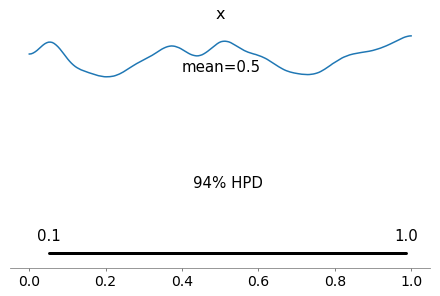

In [2]:
az.plot_posterior(prior_p_samples)

## Is this prior predictive?


In [3]:
# From statistical rethinking globe example
N_globe_throws=9

prior_predictive = binom.rvs(n=N_globe_throws, p=prior_p_samples)
prior_predictive[:5]

array([5, 9, 1, 4, 1])

# What is forward sampling in relation to prior predictive?

**From Colin**

Your prior are samples from your prior  
The prior predictive are samples from your likelihood given your prior  
In analogy with inference, the posterior are samples from your parameters, and the posterior predictive are samples from your observed variables  
So to answer your question, the forward sample is the prior *and* prior predictive  
Uah — it freaked me out because the prior and prior predictive are silly to think of in a computational context as _different_  
but if you write down a bunch of integrals it sort of makes sense ¯\_(ツ)_/¯  

## My attempt at forward sampling
Colin says samples from likelihood given prior. Is this a correct implementation?

array([0.00000000e+00, 1.11011165e-04, 4.75960372e-03, 3.41411370e-02,
       1.11011165e-01, 2.16818683e-01, 2.73129096e-01, 2.04068009e-01,
       5.68377167e-02, 0.00000000e+00])

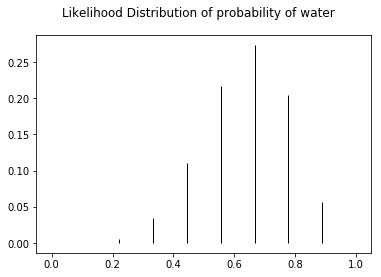

In [4]:
points = np.linspace(0,1,10)

# From Statistical Rethinking Globe example
N_water = 6
likelihood = binom.pmf(N_water, N_globe_throws, points) 

fig, ax = plt.subplots(1, 1)
ax.vlines(points, 0, likelihood, colors='k', linestyles='-', lw=1, label='frozen pmf')
fig.suptitle("Likelihood Distribution of probability of water")
likelihood

## Is this forward sampling?

In [7]:
# Normalize likelihood to 1 so I can sample from it
likelihood_normalized = likelihood/sum(likelihood)
forward_samples = np.random.choice(points, size=10, p=likelihood_normalized)
forward_samples

array([0.55555556, 0.55555556, 0.66666667, 0.66666667, 0.44444444,
       0.66666667, 0.55555556, 0.33333333, 0.77777778, 0.55555556])